# Derivative Linear Equation Stock Data

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import warnings
warnings.filterwarnings("ignore") 

# yfinance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [30]:
# input
symbol = 'AMD'
start = '2017-01-01'
end = '2019-01-01'

# Read data 
dataset = yf.download(symbol,start,end)['Adj Close']

# View Columns
dataset.head()

[*********************100%***********************]  1 of 1 completed


Date
2017-01-03    11.43
2017-01-04    11.43
2017-01-05    11.24
2017-01-06    11.32
2017-01-09    11.49
Name: Adj Close, dtype: float64

In [31]:
df = dataset.reset_index()

In [32]:
df.head()

,Date,Adj Close
0,2017-01-03,11.43
1,2017-01-04,11.43
2,2017-01-05,11.24
3,2017-01-06,11.32
4,2017-01-09,11.49


In [33]:
df.tail()

,Date,Adj Close
497,2018-12-24,16.650000
498,2018-12-26,17.900000
499,2018-12-27,17.490000
500,2018-12-28,17.820000
501,2018-12-31,18.459999


In [34]:
max_p = df['Adj Close'].max()
min_p = df['Adj Close'].min()
avg_p = df['Adj Close'].mean()

In [35]:
data = df.drop(['Date'], axis=1)
data

,Adj Close
0,11.430000
1,11.430000
2,11.240000
3,11.320000
4,11.490000
...,...
497,16.650000
498,17.900000
499,17.490000
500,17.820000


In [36]:
data = data.reset_index()

In [37]:
data.values

array([[  0.        ,  11.43000031],
       [  1.        ,  11.43000031],
       [  2.        ,  11.23999977],
       ...,
       [499.        ,  17.48999977],
       [500.        ,  17.81999969],
       [501.        ,  18.45999908]])

In [38]:
from numpy import ones,vstack
from numpy.linalg import lstsq

In [39]:
points = data.values

In [40]:
x_coords, y_coords = zip(*points)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]


In [41]:
print("Line Equation is y = {m}x + {c}".format(m=m,c=c))


Line Equation is y = 0.021718614923358772x + 9.372574584656503


In [42]:
equation_of_line = print("y = {m}x + {c}".format(m=m,c=c))


y = 0.021718614923358772x + 9.372574584656503


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


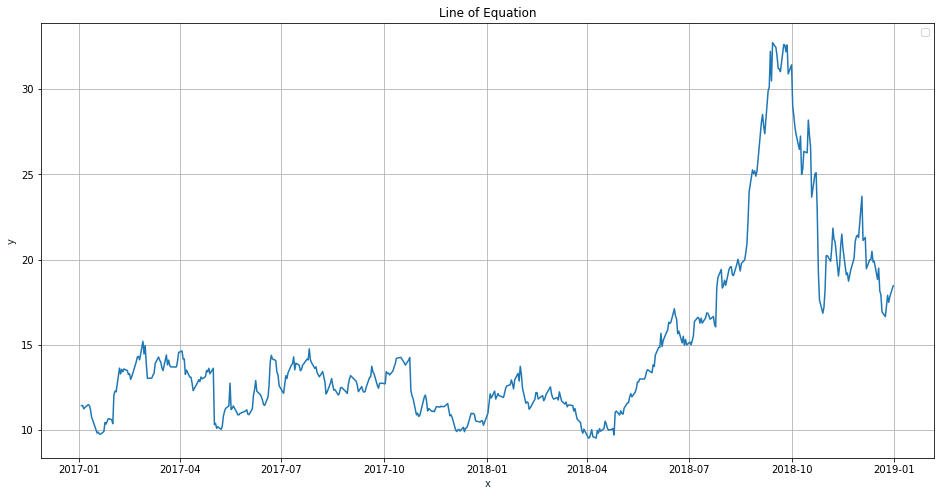

In [43]:
plt.figure(figsize=(16,8))
plt.plot(dataset)
plt.title('Line of Equation', equation_of_line)
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='best')
plt.grid()
plt.show()

In [44]:
from sympy import *

In [45]:
x = Symbol('x')

In [46]:
y = 0.021718614923358824*x + 9.372574584656498

In [47]:
yder = y.diff(x)
yder

0.0217186149233588

In [48]:
y =  0.021718614923358824*(df.index) + 9.372574584656498

In [49]:
y

Float64Index([ 9.372574584656498,  9.394293199579856,  9.416011814503216,
               9.437730429426574,  9.459449044349933,  9.481167659273291,
               9.502886274196651,   9.52460488912001,  9.546323504043368,
               9.568042118966726,
              ...
              20.058133126949038, 20.079851741872396, 20.101570356795754,
              20.123288971719116, 20.145007586642475, 20.166726201565833,
               20.18844481648919, 20.210163431412553,  20.23188204633591,
               20.25360066125927],
             dtype='float64', length=502)

In [50]:
pd.DataFrame(y, columns=['Forecast'])

,Forecast
0,9.372575
1,9.394293
2,9.416012
3,9.437730
4,9.459449
...,...
497,20.166726
498,20.188445
499,20.210163
500,20.231882


In [51]:
dataset

Date
2017-01-03    11.430000
2017-01-04    11.430000
2017-01-05    11.240000
2017-01-06    11.320000
2017-01-09    11.490000
                ...    
2018-12-24    16.650000
2018-12-26    17.900000
2018-12-27    17.490000
2018-12-28    17.820000
2018-12-31    18.459999
Name: Adj Close, Length: 502, dtype: float64

In [52]:
forecast = pd.DataFrame(y, columns=['Forecast'])
forecast

,Forecast
0,9.372575
1,9.394293
2,9.416012
3,9.437730
4,9.459449
...,...
497,20.166726
498,20.188445
499,20.210163
500,20.231882


In [53]:
df = dataset.reset_index()

In [54]:
df = df.join(forecast)

In [55]:
df

,Date,Adj Close,Forecast
0,2017-01-03,11.430000,9.372575
1,2017-01-04,11.430000,9.394293
2,2017-01-05,11.240000,9.416012
3,2017-01-06,11.320000,9.437730
4,2017-01-09,11.490000,9.459449
...,...,...,...
497,2018-12-24,16.650000,20.166726
498,2018-12-26,17.900000,20.188445
499,2018-12-27,17.490000,20.210163
500,2018-12-28,17.820000,20.231882


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


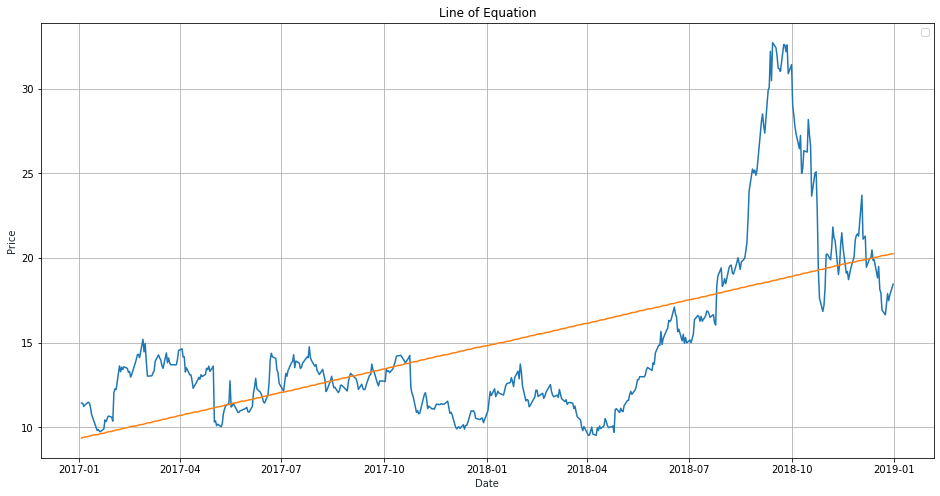

In [56]:
plt.figure(figsize=(16,8))
plt.plot(df.Date, df['Adj Close'])
plt.plot(df.Date, df['Forecast'])
plt.title('Line of Equation', equation_of_line)
plt.xlabel('Date', color='#1C2833')
plt.ylabel('Price', color='#1C2833')
plt.legend(loc='best')
plt.grid()
plt.show()